<a href="https://colab.research.google.com/github/yuione51/sample/blob/main/performance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv('실적 데이터(샘플) - 복사본.csv', low_memory=False)

In [2]:
# 결측값 확인
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
실적월       0
결제일자      0
초등        4
중등      225
리틀      352
총합계       0
dtype: int64


In [3]:
# 결측치 처리 - 0으로 대체
data['초등'].fillna(0, inplace=True)
data['중등'].fillna(0, inplace=True)
data['리틀'].fillna(0, inplace=True)

In [4]:
# 결측값 확인
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
실적월     0
결제일자    0
초등      0
중등      0
리틀      0
총합계     0
dtype: int64


In [6]:
# "월" 제거 및 실적월을 날짜 형식으로 변환
data['실적월'] = data['실적월'].str.replace('월', '')
data['실적월'] = pd.to_datetime(data['실적월'], format='%Y-%m')

In [8]:
# 월별 데이터 집계 (초등, 중등, 리틀 열만 선택)
monthly_data = data.groupby(data['실적월'].dt.to_period('M'))[['초등', '중등', '리틀']].sum()

In [9]:
print(monthly_data)

             초등    중등    리틀
실적월                        
2022-01   825.0  61.0   0.0
2022-02   861.0  51.0   0.0
2022-03  1287.0  61.0   0.0
2022-04   352.0  16.0   0.0
2022-05   364.0  30.0   0.0
2022-06   296.0  11.0   0.0
2022-07   278.0  23.0   0.0
2022-08   319.0  15.0   0.0
2022-09   250.0  18.0  15.0
2022-10   336.0  17.0  20.0
2022-11   312.0  10.0  19.0
2022-12   770.0  30.0  16.0
2023-01   737.0  35.0  15.0
2023-02   570.0  38.0  16.0
2023-03   797.0  35.0  23.0
2023-04   263.0  17.0  12.0
2023-05   658.0  43.0  36.0
2023-06   415.0  23.0  27.0
2023-07   276.0  14.0  16.0
2023-08   362.0  16.0  29.0


In [13]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 100

# 폰트 경로 설정
font_path = '/content/malgun.ttf'

# 폰트 매니저에 폰트 추가
fm.fontManager.addfont(font_path)
plt.rc('font', family='Malgun Gothic')

plt.rcParams['font.family']

['Malgun Gothic']

In [14]:
plt.rc('font', family = 'Malgun Gothic')

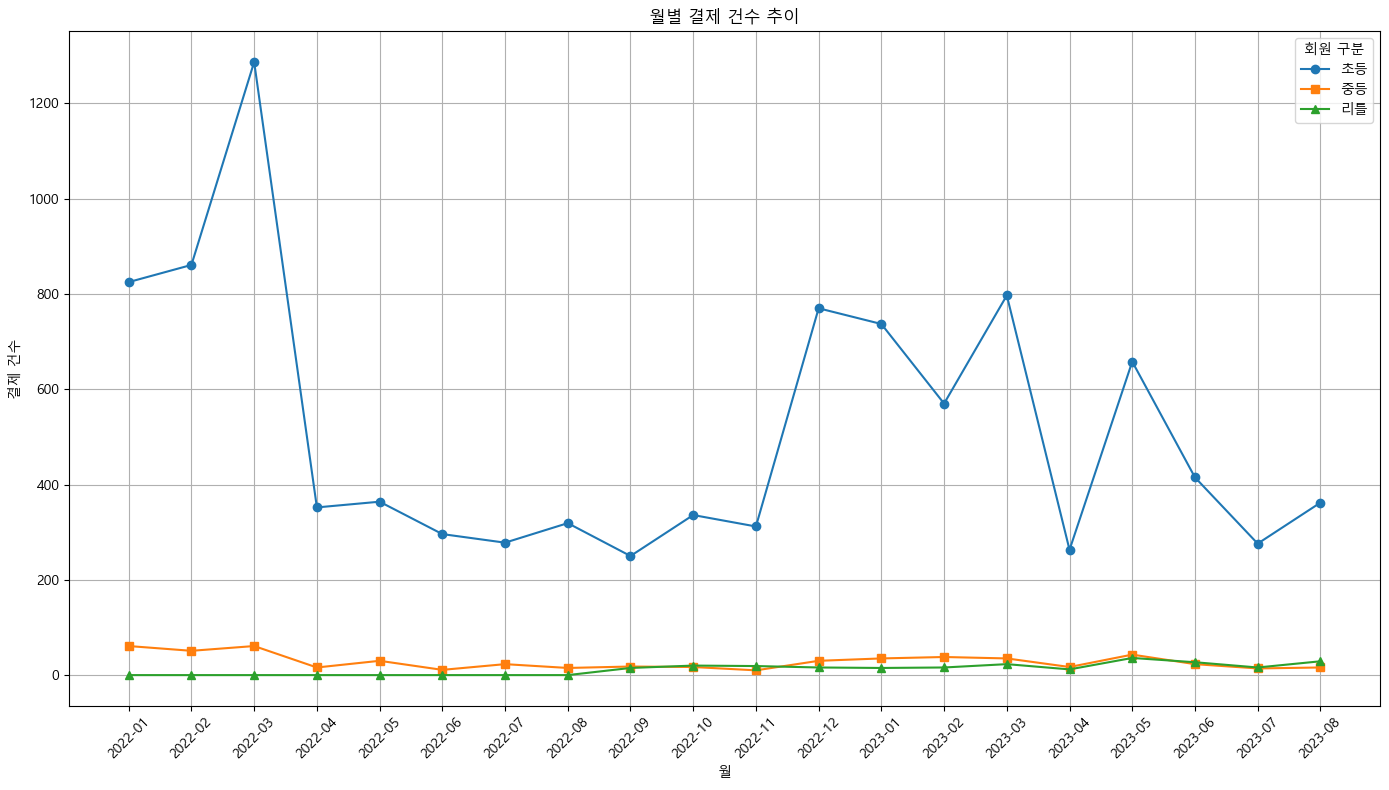

In [32]:
# 회원 구분별 결제 건수 추이 시각화
plt.figure(figsize=(14, 8))
plt.plot(monthly_data.index.astype(str), monthly_data['초등'], label='초등', marker='o')
plt.plot(monthly_data.index.astype(str), monthly_data['중등'], label='중등', marker='s')
plt.plot(monthly_data.index.astype(str), monthly_data['리틀'], label='리틀', marker='^')
plt.xlabel('월')
plt.ylabel('결제 건수')
plt.title('월별 결제 건수 추이')
plt.legend(title='회원 구분')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# 결제일자를 날짜 형식으로 변환
data['결제일자'] = pd.to_datetime(data['결제일자'], format='%Y-%m-%d')

In [20]:
# 일자별 데이터 집계 (결제 건수와 관련된 열만 선택)
daily_data = data.groupby('결제일자')[['초등', '중등', '리틀']].sum()


In [21]:
print(daily_data)

               초등   중등   리틀
결제일자                       
2022-01-03   35.0  4.0  0.0
2022-01-04   40.0  1.0  0.0
2022-01-05   38.0  2.0  0.0
2022-01-06   33.0  0.0  0.0
2022-01-07   36.0  8.0  0.0
...           ...  ...  ...
2023-08-29   32.0  0.0  1.0
2023-08-30   31.0  2.0  3.0
2023-08-31  100.0  3.0  6.0
2023-09-01    1.0  0.0  2.0
2023-09-04    0.0  0.0  1.0

[463 rows x 3 columns]


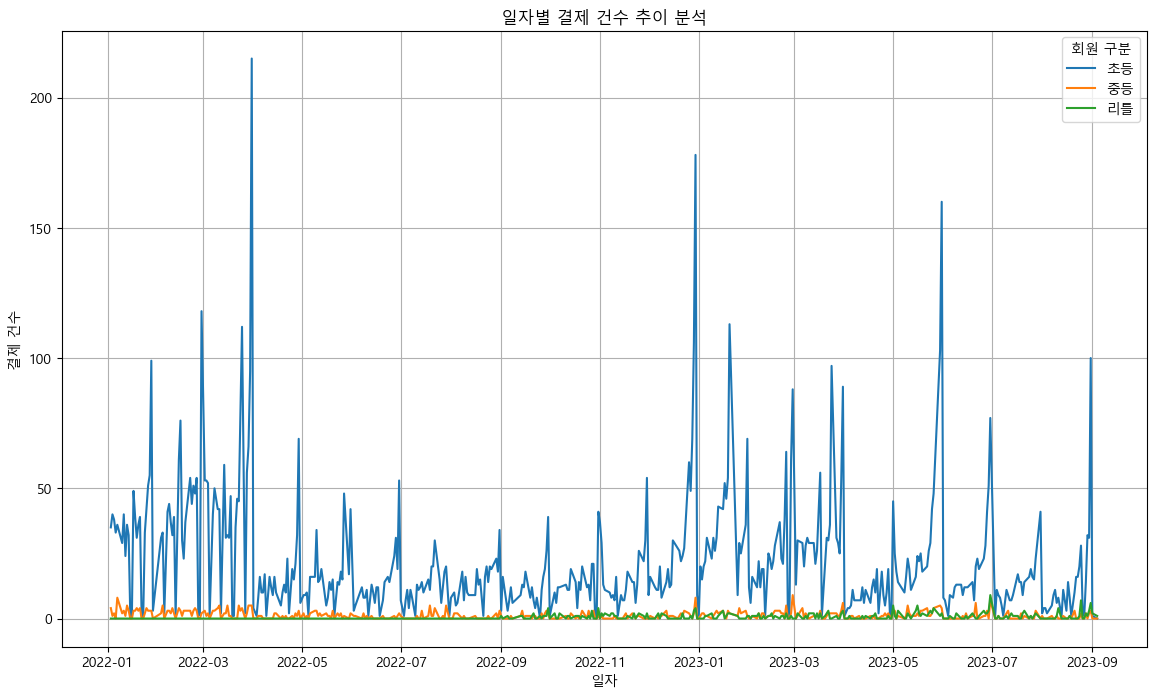

In [38]:
# 일자별 결제 건수 시각화
plt.figure(figsize=(14, 8))
plt.plot(daily_data.index, daily_data['초등'], label='초등')
plt.plot(daily_data.index, daily_data['중등'], label='중등')
plt.plot(daily_data.index, daily_data['리틀'], label='리틀')
plt.xlabel('일자')
plt.ylabel('결제 건수')
plt.title('일자별 결제 건수 추이 분석')
plt.legend(title='회원 구분')
plt.grid(True)
plt.show()

In [23]:
# 요일별 결제 건수 분석
data['요일'] = data['결제일자'].dt.day_name()
weekday_data = data.groupby('요일')[['초등', '중등', '리틀']].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

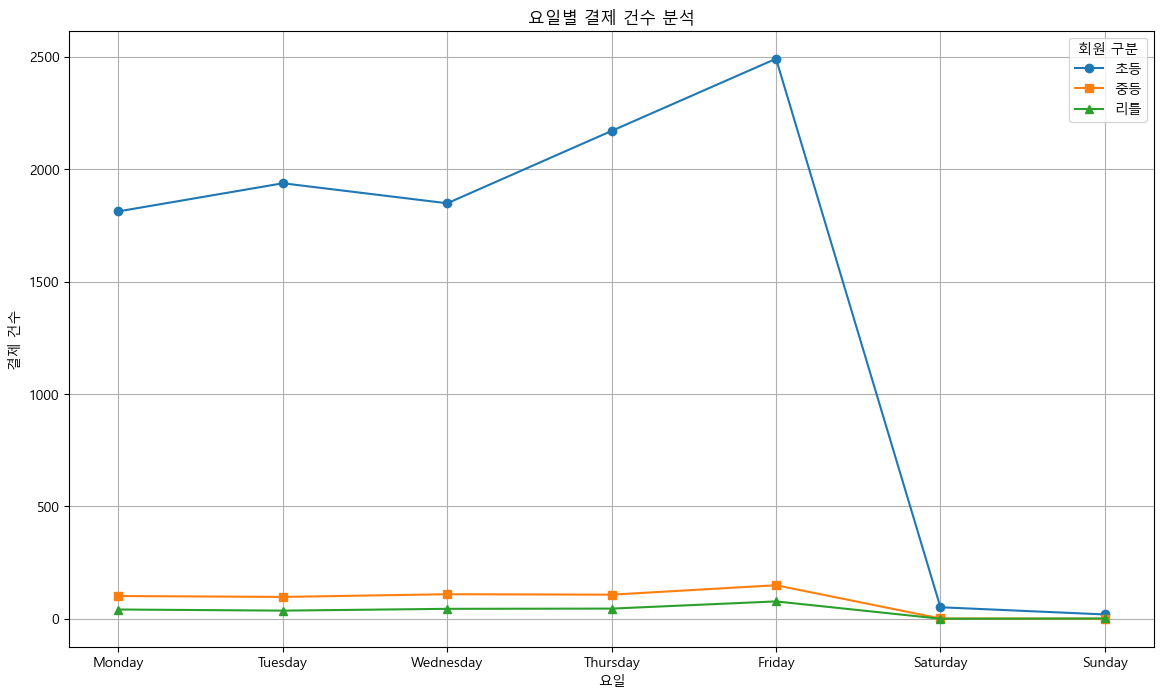

In [34]:
# 요일별 결제 건수 시각화
plt.figure(figsize=(14, 8))
plt.plot(weekday_order, weekday_data.reindex(weekday_order)['초등'], label='초등', marker='o')
plt.plot(weekday_order, weekday_data.reindex(weekday_order)['중등'], label='중등', marker='s')
plt.plot(weekday_order, weekday_data.reindex(weekday_order)['리틀'], label='리틀', marker='^')
plt.xlabel('요일')
plt.ylabel('결제 건수')
plt.title('요일별 결제 건수 분석')
plt.legend(title='회원 구분')
plt.grid(True)
plt.show()

In [26]:
# 전체 결제 건수 계산
total_payments = data[['초등', '중등', '리틀']].sum()

# 회원 구분별 전체 결제 비율
payment_ratio = total_payments / total_payments.sum() * 100

In [27]:
print(payment_ratio)

초등    92.744253
중등     5.064655
리틀     2.191092
dtype: float64


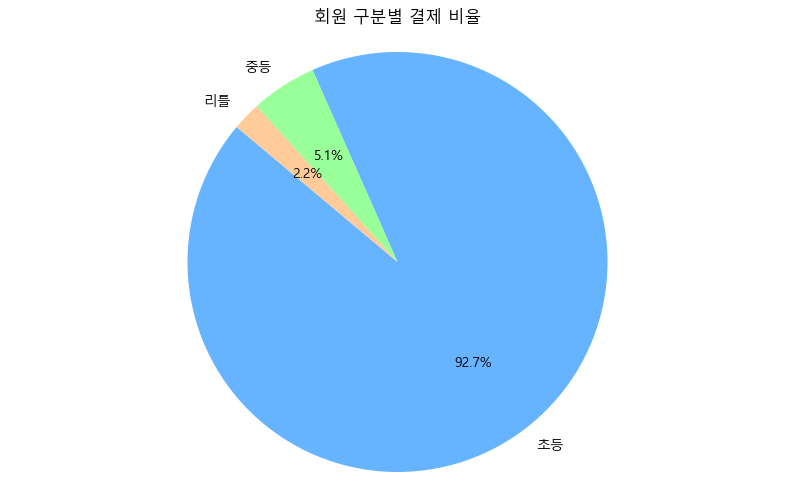

In [30]:
# 결제 비율 시각화
plt.figure(figsize=(10, 6))
plt.pie(payment_ratio, labels=payment_ratio.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('회원 구분별 결제 비율')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()